In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model import Market
import seaborn as sns
from agents import Firm
from model import Market

import networkx as nx


In [2]:
n_households = 500
n_firms = 50
firms_production = 12
min_income = 0
max_income = 10
min_quality = 0
max_quality = 1
decrease_price = 0.2
increase_price = 0.1
price_change = 0.01
toy_mode = False

model = Market(F=n_firms, H=n_households, firms_production=firms_production,
                min_income=min_income, max_income=max_income, 
                min_quality=min_quality, max_quality=max_quality,
                decrease_price=decrease_price, increase_price=increase_price,
                price_change=price_change, toy_mode=toy_mode )
steps = 1000
for i in range(steps):
    #print('step', i)
    model.step()
    

/Users/todd/WWCS_2023_markets/env/lib/python3.9/site-packages/scipy/sparse/_base.py:752: VisibleDeprecationWarning: Please use `.todense()` instead
  warn(np.VisibleDeprecationWarning(


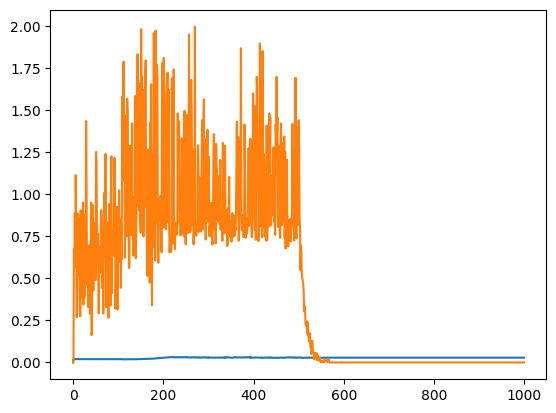

,HHI,Distance
0,0.000000,0.0000
1,0.020000,0.0000
2,0.020000,0.6755
3,0.020000,0.5654
4,0.020000,0.8864
...,...,...
995,0.028605,0.0000
996,0.028605,0.0000
997,0.028605,0.0000
998,0.028605,0.0000


In [3]:
a = model.datacollector.get_model_vars_dataframe()
a['HHI'].plot()
a['Distance'].plot()
plt.show()
a

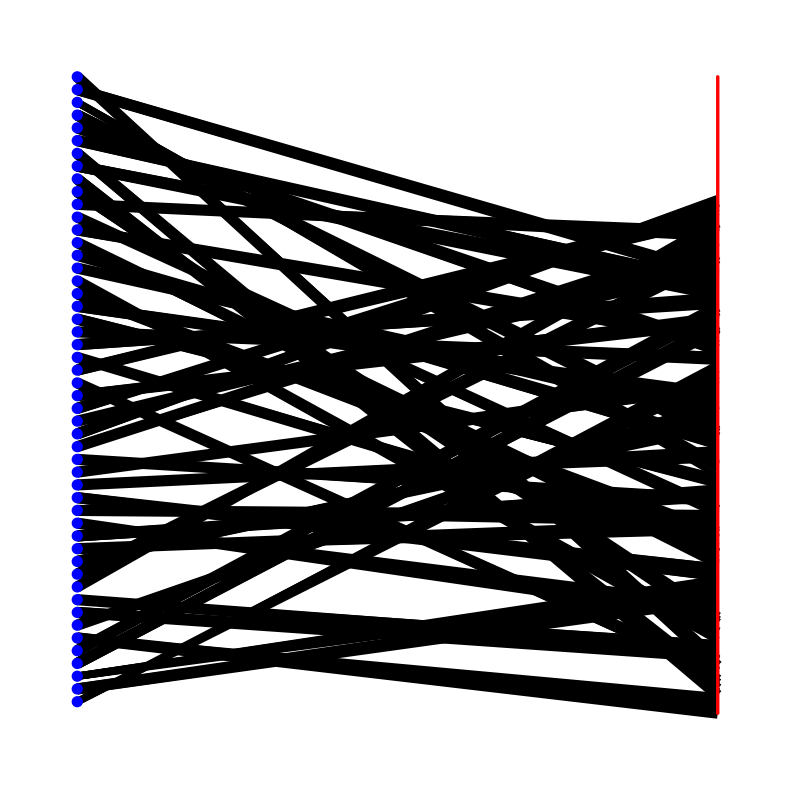

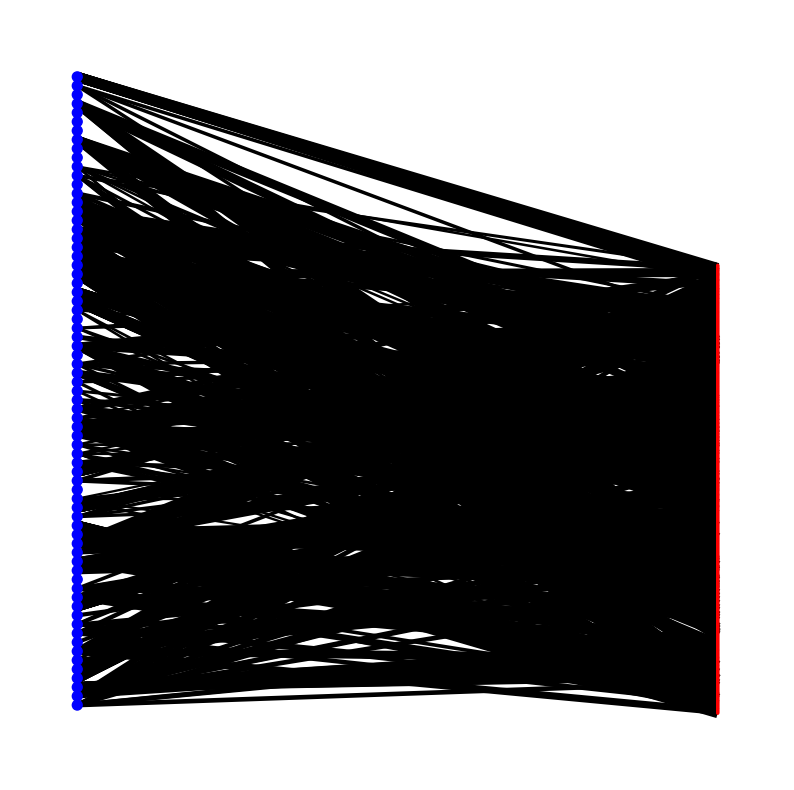

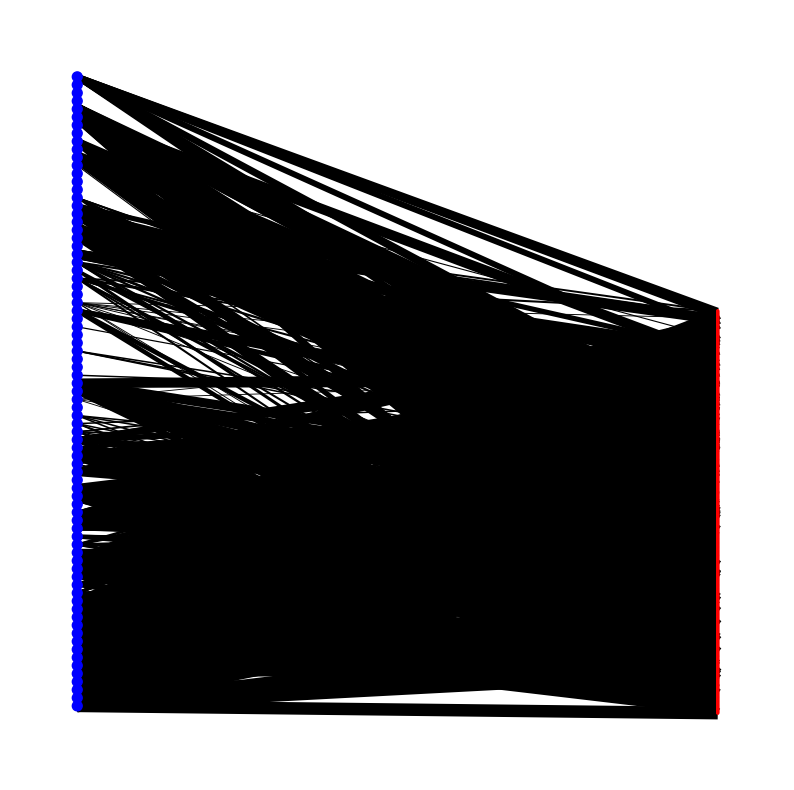

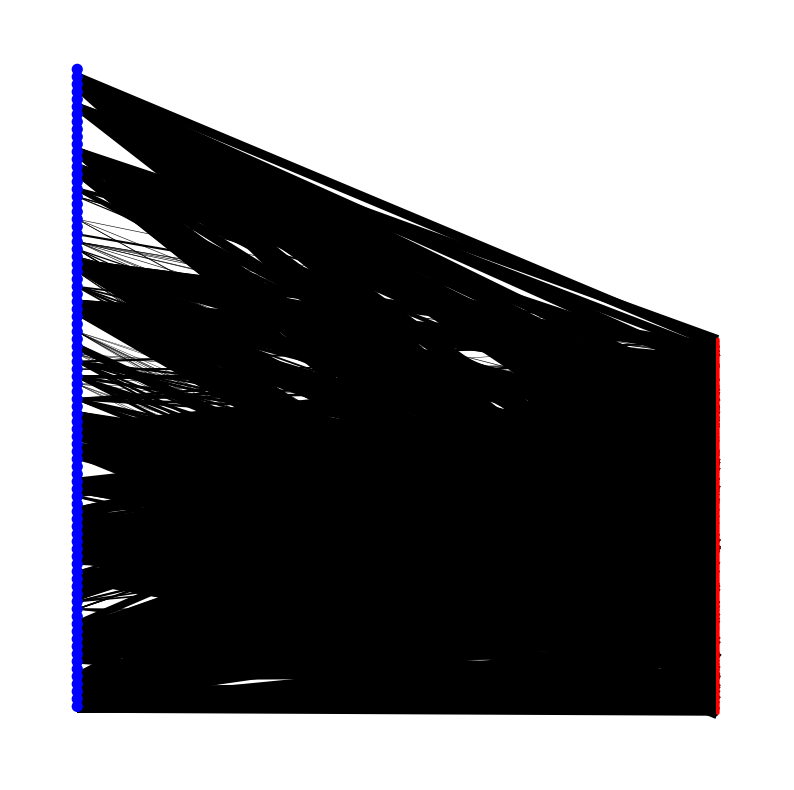

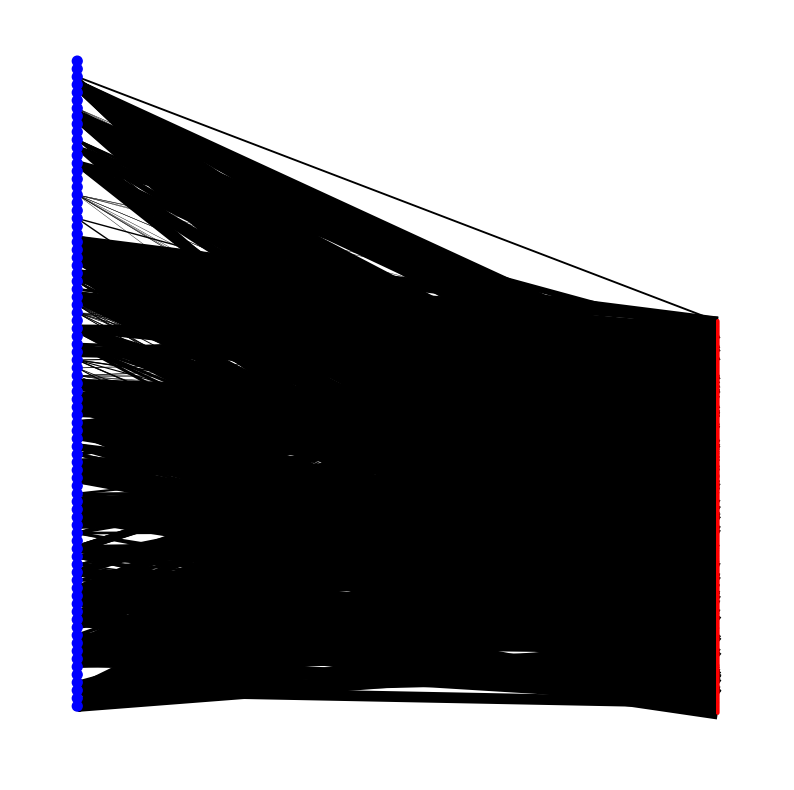

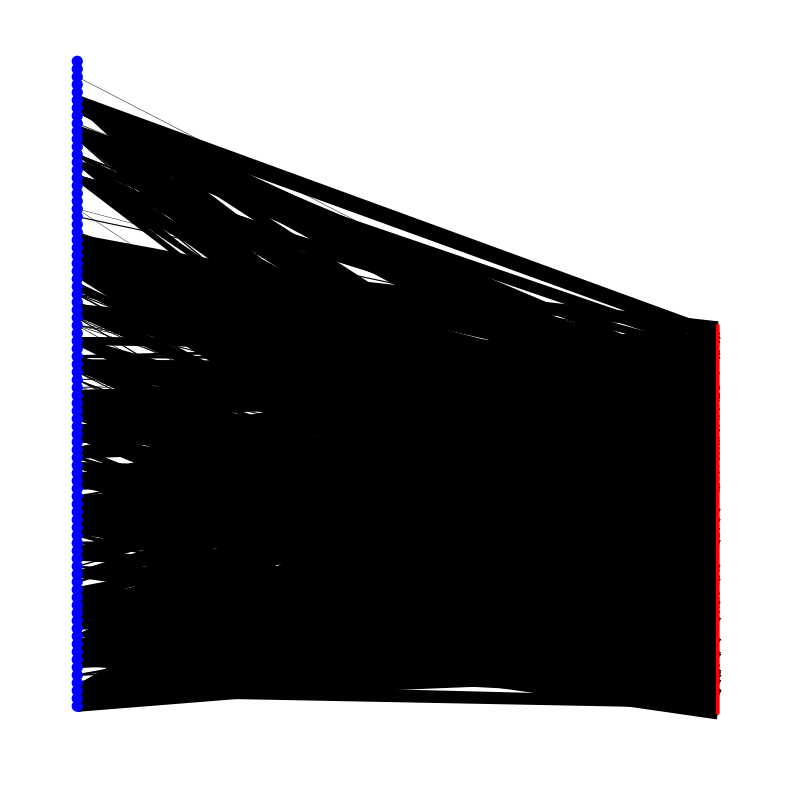

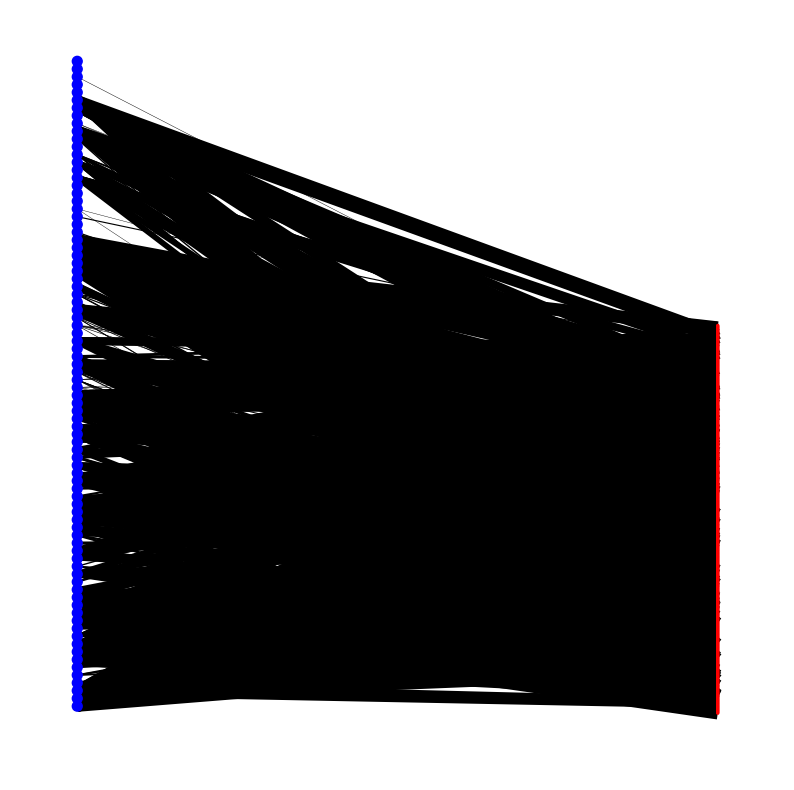

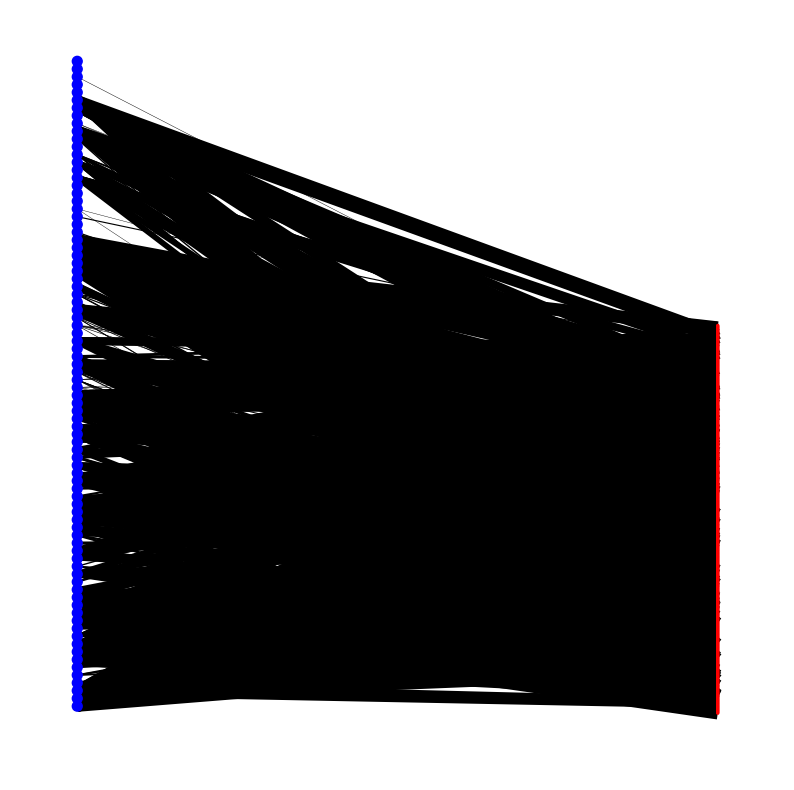

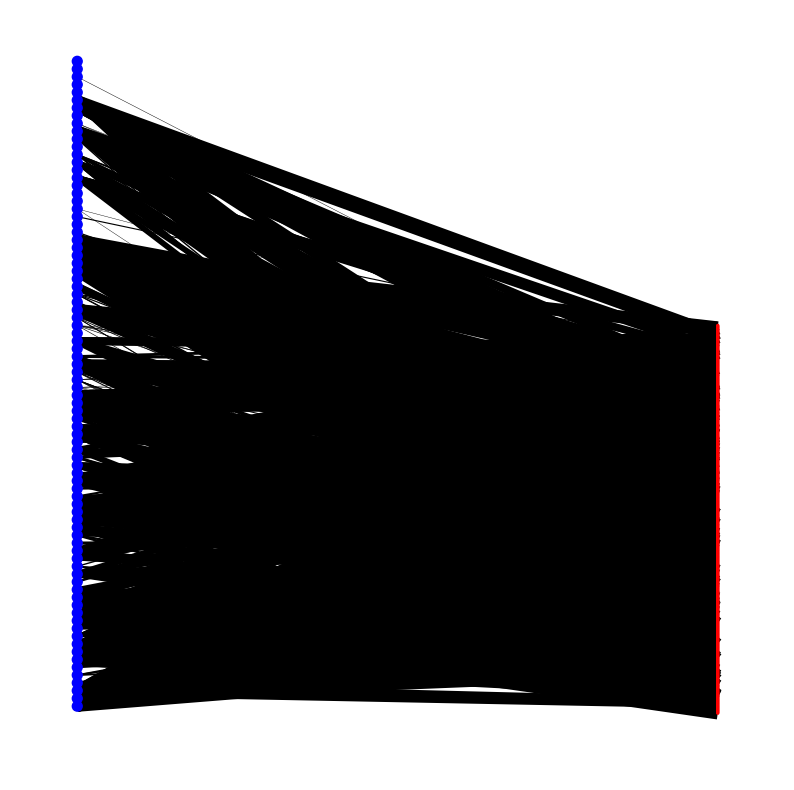

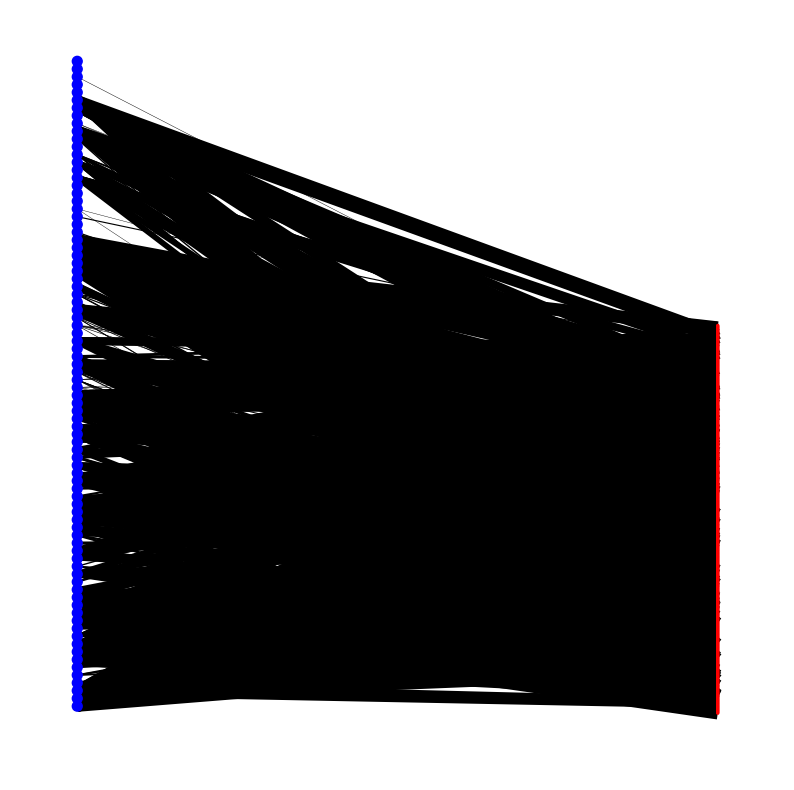

In [4]:
# draw the graph of the last step with  Weight
# remove the nodes with no edges

for i in range(1, len(model.graphs)):
    if i % 100 == 0:
        # model.graphs[i].remove_nodes_from(list(nx.isolates(model.graphs[i])))
        # color the nodes by type
        color_map = []
        node_map = []
        pos = {}
        f = 1
        h = 1
        for node in model.graphs[i]:
            if type(node) is Firm:
                color_map.append('blue')
                node_map.append(50)
                pos[node] = (1, f * 10)
                f += 1
            else:
                color_map.append('red')
                node_map.append(2)
                pos[node] = (2, h)
                h += 1
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        # draw the bipartite graph using the node color map

        nx.draw(model.graphs[i], with_labels=False, width=[model.graphs[i][u][v]['weight'] for u,v in model.graphs[i].edges()], node_color = color_map, node_size = node_map, pos=pos)
        #plt.show()



In [5]:
df = model.datacollector.get_agent_vars_dataframe().reset_index()

In [6]:
# for each Step, computes the HHI for each Firm
df_firm = df.loc[df['Type'] == 'Firm']
# normalize df_firm['Revenue'] in each Step
df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
# square the Market_share
df_firm['R'] = df_firm['Market_share']**2
# compute the HHI
HHI = df_firm.groupby(['Step'])['R'].sum()

#df_firm['HHI'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x**2).groupby(['Step', 'Type']).transform('sum')



/var/folders/cy/01tnmvcx0_d54pv4f2k6dkv40000gn/T/ipykernel_12013/3487603048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['Market_share'] = df_firm.groupby(['Step'])['Revenue'].transform(lambda x: x/x.sum())
/var/folders/cy/01tnmvcx0_d54pv4f2k6dkv40000gn/T/ipykernel_12013/3487603048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['R'] = df_firm['Market_share']**2


Graph with 584 nodes and 500 edges
Graph with 550 nodes and 160 edges
Graph with 625 nodes and 500 edges
Graph with 625 nodes and 160 edges
Graph with 550 nodes and 160 edges
Graph with 550 nodes and 158 edges
Graph with 550 nodes and 160 edges
Graph with 550 nodes and 158 edges
Graph with 550 nodes and 158 edges
Graph with 550 nodes and 165 edges
Graph with 550 nodes and 158 edges
Graph with 550 nodes and 165 edges
Graph with 550 nodes and 165 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 165 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 167 edges
Graph with 550 nodes and 162 edges
Graph with 550 nodes and 167 edges
Graph with 550 nodes and 167 edges
Graph with 550 nodes and 160 edges
Graph with 550 nodes and 167 edges
Graph with 550 nodes and 160 edges
Graph with 550 nodes

Graph with 550 nodes and 270 edges
Graph with 550 nodes and 266 edges
Graph with 550 nodes and 266 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 266 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 274 edges
Graph with 550 nodes and 273 edges
Graph with 550 nodes and 274 edges
Graph with 550 nodes and 274 edges
Graph with 550 nodes and 279 edges
Graph with 550 nodes and 274 edges
Graph with 550 nodes and 279 edges
Graph with 550 nodes and 279 edges
Graph with 550 nodes and 280 edges
Graph with 550 nodes and 279 edges
Graph with 550 nodes and 280 edges
Graph with 550 nodes and 280 edges
Graph with 550 nodes and 283 edges
Graph with 550 nodes and 280 edges
Graph with 550 nodes and 283 edges
Graph with 550 nodes and 283 edges
Graph with 550 nodes and 285 edges
Graph with 550 nodes

Graph with 567 nodes and 540 edges
Graph with 567 nodes and 542 edges
Graph with 567 nodes and 540 edges
Graph with 567 nodes and 542 edges
Graph with 567 nodes and 542 edges
Graph with 566 nodes and 547 edges
Graph with 568 nodes and 542 edges
Graph with 568 nodes and 547 edges
Graph with 566 nodes and 547 edges
Graph with 566 nodes and 550 edges
Graph with 567 nodes and 547 edges
Graph with 567 nodes and 550 edges
Graph with 566 nodes and 550 edges
Graph with 566 nodes and 542 edges
Graph with 567 nodes and 550 edges
Graph with 567 nodes and 542 edges
Graph with 566 nodes and 542 edges
Graph with 565 nodes and 548 edges
Graph with 566 nodes and 542 edges
Graph with 566 nodes and 548 edges
Graph with 565 nodes and 548 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes and 548 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes and 556 edges
Graph with 566 nodes

Graph with 569 nodes and 433 edges
Graph with 570 nodes and 433 edges
Graph with 570 nodes and 433 edges
Graph with 570 nodes and 433 edges
Graph with 570 nodes and 433 edges
Graph with 571 nodes and 433 edges
Graph with 571 nodes and 433 edges
Graph with 571 nodes and 433 edges
Graph with 571 nodes and 433 edges
Graph with 571 nodes and 439 edges
Graph with 572 nodes and 433 edges
Graph with 572 nodes and 439 edges
Graph with 571 nodes and 439 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 437 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 437 edges
Graph with 572 nodes and 437 edges
Graph with 572 nodes and 440 edges
Graph with 572 nodes and 437 edges
Graph with 572 nodes and 440 edges
Graph with 572 nodes and 440 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes and 440 edges
Graph with 572 nodes and 439 edges
Graph with 572 nodes

Graph with 577 nodes and 483 edges
Graph with 578 nodes and 489 edges
Graph with 578 nodes and 483 edges
Graph with 578 nodes and 489 edges
Graph with 578 nodes and 489 edges
Graph with 581 nodes and 488 edges
Graph with 582 nodes and 489 edges
Graph with 582 nodes and 488 edges
Graph with 581 nodes and 488 edges
Graph with 580 nodes and 487 edges
Graph with 581 nodes and 488 edges
Graph with 581 nodes and 487 edges
Graph with 580 nodes and 487 edges
Graph with 581 nodes and 489 edges
Graph with 581 nodes and 487 edges
Graph with 581 nodes and 489 edges
Graph with 581 nodes and 489 edges
Graph with 580 nodes and 491 edges
Graph with 582 nodes and 489 edges
Graph with 582 nodes and 491 edges
Graph with 580 nodes and 491 edges
Graph with 581 nodes and 487 edges
Graph with 582 nodes and 491 edges
Graph with 582 nodes and 487 edges
Graph with 581 nodes and 487 edges
Graph with 580 nodes and 484 edges
Graph with 581 nodes and 487 edges
Graph with 581 nodes and 484 edges
Graph with 580 nodes

Graph with 589 nodes and 518 edges
Graph with 590 nodes and 535 edges
Graph with 590 nodes and 518 edges
Graph with 590 nodes and 535 edges
Graph with 590 nodes and 535 edges
Graph with 590 nodes and 523 edges
Graph with 590 nodes and 535 edges
Graph with 590 nodes and 523 edges
Graph with 590 nodes and 523 edges
Graph with 590 nodes and 520 edges
Graph with 590 nodes and 523 edges
Graph with 590 nodes and 520 edges
Graph with 590 nodes and 520 edges
Graph with 590 nodes and 530 edges
Graph with 591 nodes and 520 edges
Graph with 591 nodes and 530 edges
Graph with 590 nodes and 530 edges
Graph with 588 nodes and 528 edges
Graph with 591 nodes and 530 edges
Graph with 591 nodes and 528 edges
Graph with 588 nodes and 528 edges
Graph with 590 nodes and 551 edges
Graph with 590 nodes and 528 edges
Graph with 590 nodes and 551 edges
Graph with 590 nodes and 551 edges
Graph with 590 nodes and 531 edges
Graph with 591 nodes and 551 edges
Graph with 591 nodes and 531 edges
Graph with 590 nodes

Graph with 586 nodes and 536 edges
Graph with 586 nodes and 556 edges
Graph with 586 nodes and 536 edges
Graph with 586 nodes and 556 edges
Graph with 586 nodes and 556 edges
Graph with 585 nodes and 530 edges
Graph with 586 nodes and 556 edges
Graph with 586 nodes and 530 edges
Graph with 585 nodes and 530 edges
Graph with 586 nodes and 534 edges
Graph with 586 nodes and 530 edges
Graph with 586 nodes and 534 edges
Graph with 586 nodes and 534 edges
Graph with 586 nodes and 528 edges
Graph with 587 nodes and 534 edges
Graph with 587 nodes and 528 edges
Graph with 586 nodes and 528 edges
Graph with 586 nodes and 548 edges
Graph with 586 nodes and 528 edges
Graph with 586 nodes and 548 edges
Graph with 586 nodes and 548 edges
Graph with 586 nodes and 543 edges
Graph with 586 nodes and 548 edges
Graph with 586 nodes and 543 edges
Graph with 586 nodes and 543 edges
Graph with 586 nodes and 537 edges
Graph with 586 nodes and 543 edges
Graph with 586 nodes and 537 edges
Graph with 586 nodes

Graph with 582 nodes and 536 edges
Graph with 584 nodes and 536 edges
Graph with 584 nodes and 536 edges
Graph with 584 nodes and 536 edges
Graph with 584 nodes and 536 edges
Graph with 583 nodes and 545 edges
Graph with 584 nodes and 536 edges
Graph with 584 nodes and 545 edges
Graph with 583 nodes and 545 edges
Graph with 583 nodes and 542 edges
Graph with 583 nodes and 545 edges
Graph with 583 nodes and 542 edges
Graph with 583 nodes and 542 edges
Graph with 582 nodes and 523 edges
Graph with 583 nodes and 542 edges
Graph with 583 nodes and 523 edges
Graph with 582 nodes and 523 edges
Graph with 582 nodes and 525 edges
Graph with 582 nodes and 523 edges
Graph with 582 nodes and 525 edges
Graph with 582 nodes and 525 edges
Graph with 583 nodes and 529 edges
Graph with 584 nodes and 525 edges
Graph with 584 nodes and 529 edges
Graph with 583 nodes and 529 edges
Graph with 584 nodes and 530 edges
Graph with 585 nodes and 529 edges
Graph with 585 nodes and 530 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 499 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes and 500 edges
Graph with 584 nodes

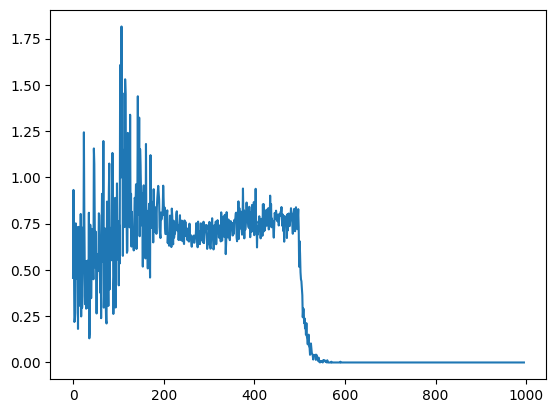

In [8]:
def refresh_graph(graph_a, additions):
    """Ensures that the nodes (and the adjacency lists) are in the right order"""
    out = nx.Graph()
    nodes = list(graph_a.nodes()) + list(additions)
    nodes = sorted(nodes)
    out.add_nodes_from(nodes)
    out.add_edges_from(graph_a.edges())
    return out

def compute_change(graph_a, graph_b):
    additions = graph_b.nodes() - graph_a.nodes() 
    deletions = graph_a.nodes() - graph_b.nodes() 
    graph_a = refresh_graph(graph_a, additions)
    graph_b = refresh_graph(graph_b, deletions)    
    prev = nx.adjacency_matrix(graph_a).A
    curr = nx.adjacency_matrix(graph_b).A
    change = sum(sum(abs(curr - prev)))
    maximum = sum(sum(prev))
    return change / maximum

def change_metric(graphs):
    """
    Takes in a list of transaction graphs and returns a list of the change between each
    """
    output = [0]
    for i in range(0, len(graphs)):
        output.append(compute_change(graphs[i-1], graphs[i]))
    return output

our_metric = change_metric(model.graphs[1:])
our_metric = our_metric[5:]
plt.plot(our_metric)

Graph with 4 nodes and 2 edges
Graph with 5 nodes and 3 edges
Graph with 6 nodes and 2 edges
Graph with 6 nodes and 3 edges


1.5

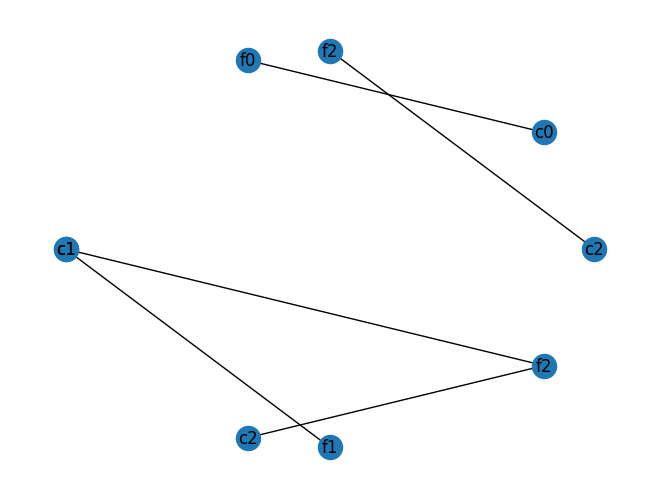

In [9]:
a = nx.Graph()
a.add_edge("c1", "f1", weight=1)
a.add_edge("c2", "f2", weight=1)
nx.draw_shell(a, with_labels=True)

b = a.copy()
b.remove_node('f1')
b.add_edge("c1", "f2", weight=1)
b.add_edge("c0", "f0", weight=1)
nx.draw_shell(b, with_labels=True)

compute_change(a,b)

In [ ]:
HHI.plot()

In [ ]:
def compute_hhi_diff(hhi):
    hhi_diff = [0]

    for i in range(1, len(hhi)):
        change = abs(hhi[i] - hhi[i-1])
        hhi_diff.append(change)

    return hhi_diff

plt.plot(our_metric)
plt.plot(compute_hhi_diff(HHI))

In [ ]:
#sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')
sns.lineplot(data=df, y='budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Initial_budget', x='Step', estimator='sum')
sns.lineplot(data=df, y='Revenue', x='Step', estimator='sum')


In [ ]:
# draw the graph with the number of firms
# count the number of AgentID in each step
df_firm['number'] = 1

sns.lineplot(data=df_firm, x='Step', y='number', estimator='sum')


In [ ]:
sns.lineplot(data=df_firm, y='Net_worth', x='Step', hue='AgentID')

In [ ]:
sns.lineplot(data=df_firm, y='Quality', x='Step', hue = 'AgentID')

In [ ]:
sns.lineplot(data=df_firm, y='Price', x='Step', hue = 'AgentID')

In [ ]:
sns.lineplot(data=df, y='Quantity_sold', x='Step', estimator='sum')


In [ ]:
sns.lineplot(data=df, y='Revenue', x='Step')


In [ ]:
sns.lineplot(data=df.loc[df['AgentID'] == 1020],
             y='Revenue', x='Step', hue='AgentID')


In [ ]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Household')].sort_values('budget')


In [ ]:
df.loc[(df['Step'] == 0) & (df['Type'] == 'Firm')].sort_values('Quality')


In [ ]:
sns.barplot(data=df.loc[(df['Step'] == 0) & (
    df['Type'] == 'Firm')], y='Quality', x='AgentID')


In [ ]:
df.loc[df['AgentID'] == 1009]


In [ ]:

# for each step plot use seaborn to do a 1x2 plot with the distribution of the "Price" and "Revenue" of the firms
for i in range(steps):
    if i % 10 == 0:
        df1 = df[df["Step"] == i]
        df1 = df1[df1["Type"] == "Firm"]
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        sns.histplot(df1["Price"], ax=ax[0])
        sns.histplot(df1["Revenue"], ax=ax[1])
        # set the title of the plot to the step
        fig.suptitle("Step " + str(i))
        plt.show()


In [ ]:
firms = df.loc[df['Type'] == "Firm"]
df.loc[(df['Type'] == "Firm") & (df['Step'] == 99)]['Revenue'].sum()
hhi = pd.DataFrame(data={'step': range(0,100)})
hhi = hhi.assign(volume=lambda x: df.loc[(df['Type'] == "Firm") & (df['Step'] == x.step)]['Revenue'].sum())
hhi 